<a href="https://colab.research.google.com/github/CodeJaymes/Machine-Learn/blob/ML/Linear_Regression_Using_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Building my First Linear Regression Model **

Basically, A linear  Regression is a model that is used to predict the a particular corresponding value, given an input 

Say For Example 
I have two variables, Liquidity(Cash) and Houses I can build 
The type of house or number of houses I can build depends on how much  money I have  
So the higher my liquidty, the greater the number of houses 
In othe words: There is a direct proportionality between liquidty and structure 

In [ ]:
# Therefore a linear regression model in its simplest form is a straight line defined by y = mx + c 
# m in this case is our slope or weights (w) in ML and c(intercept) is called the bias 
# Rewriting our formaula , we have y = wx + b
# In order to start building , we will define our model name , Linear Regression in this case 

class Linear_Regression():
 
 # The next step is to understand the functions that will be within our class 
 # We start by initializing our class with the important parameters of gradient descent, namely the number of iterations and the learning rate 

  def __init__(self, learning_rate,no_of_iterations):
    self.learning_rate = learning_rate 
    self.no_of_iterations =  no_of_iterations


  def fit(self,X,Y):


    self.X =  X #initialize all the features of the dataset and store them in X  
    self.Y = Y  #initialize all the targets(what we want to predict) of the dataset and store them in Y  


    #r and c is being used to store the number of rows  and columns generated from the input data here (X.shape )
    self.r, self.c = X.shape
    
    #initializing the slope and intercept to zero
    self.w =  np.zeros(self.c) #Here we just created a numpy array of c columns where c is the number of faetures, to accomodate  multiple regression problem
    self.b =  0   

    #Easily put, a LR problem can have multiple slope but only one intercept per time 

 
    
    #Implementing the gradient descent algo
    for i in range (self.no_of_iterations):
       self.update_weights()



  def update_weights(self):
          y_prediction = self.predict(self.X)

          dw = - (2 * np.sum(self.X.T).dot(self.Y - y_prediction))/ self.r
          db = - (2 * np.sum(self.Y - y_prediction))/ self.r

          # Updating the weight
          # w = w-@db
          #b = b-@wb
          self.w = self.w - (self.learning_rate * dw)
          self.b = self.b - (self.learning_rate * db)

  def predict(self, X):
     return X.dot(self.w) + self.b

     #Here we are returning y = mx+c, the equation of the line at that target price





In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


salary_data =  pd.read_csv('/content/salary_data.csv')
#salary_data.head()
#print(salary_data.isnull().sum())

X = salary_data.iloc[:,:-1]
Y = salary_data.iloc[:, 1]




YearsExperience    0
Salary             0
dtype: int64


In [ ]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 1000)
x_train, x_test,y_train, y_test = train_test_split(X,Y,test_size = 0.22, random_state = 2)

#Training the model now 

training_data = model.fit(x_train, y_train)

#Predict the salary for a test date

test_predict = model.predict(x_test)

print(test_predict)







1      37025.579043
0      35143.209445
14     67143.492615
9      59614.014222
21     91614.297392
19     81261.264601
23    101967.330182
dtype: float64


In [ ]:
print('Weight or Slope  of Dataset :', model.w[0])
print('Bias or Intercept of Dataset :', model.b)

Weight or Slope  of Dataset : 9411.84799105632
Bias or Intercept of Dataset : 24790.1766550812


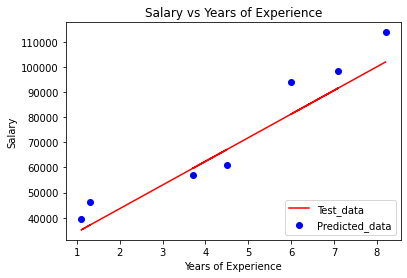

In [ ]:
#Lets visualize the prediction 
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test,test_predict, color ='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.legend(['Test_data', 'Predicted_data'],loc ="lower right")
plt.show()

In [45]:
from sklearn.metrics import r2_score , mean_squared_error 
x_train_accuracy = r2_score(y_test,test_predict)
MSE = mean_squared_error(y_test,test_predict)
RMSE = mean_squared_error(y_test,test_predict, squared = False)
print(x_train_accuracy)
print(MSE)
print(RMSE)

0.9017891072722813
69936646.53775714
8362.813314773752
